<a href="https://colab.research.google.com/github/chuyenc76/DataAnalyze/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LAB 3**


-LÀM SẠCH BỘ DỮ LIỆU

1.Missing header- Thiếu tiêu đề

2.Multi-variables in one columns - Nhiều biến trong 1 cột

3.Inconsitence values - Các giá trị không phù hợp

4.Null values - Giá trị trỗng

5.Duplicated values - Giá trị trùng lập

6.Inconsitence characters (error ASCII-based format) - Các kí tự không đồng nhất

7.Missing values - Mất giá trị


8.Missing headers - Mất tiêu đề



**Vấn đề 1**


-Tiến hành tải dữ liệu vào chương trình ứng dụng Python và giải quyết vấn đề ―Missing header in the csv file‖

-Hiển thị và quan sát dữ liệu patient_heart_rate

In [ ]:

#Lấy dữ liệu từ githup 
import pandas as pd
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/patient_heart_rate.csv')
df.head(5)

,1,Mickéy Mousé,56,70kgs,72,69,71,-,-.1,-.2
0,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
1,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
2,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
3,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
4,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72


**patientheartrate thiếu phần headers, giả sử ta cần bổ sung headers vào cho dataframe patientheartrate, thông tin các cột như sau:**

column_names=["ID", "Name", "Age", "Weight", "m0006", "m0612","m1218", "f006", "f0612", "f1218"]

In [ ]:
column_names=["ID", "Name", "Age", "Weight", "m0006", "m0612","m1218", "f006", "f0612", "f1218"]
df =  pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/patient_heart_rate.csv', names = column_names)
df.head(5)

,ID,Name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75


**VẤN ĐỀ 2**


Xử lý vấn đề một cột lưu hỗn hợp nhiều dữ liệu, ở đây là cột ―Name‖ chứa bao gồm ―Firstname‖ và ―Lastname‖, giải pháp là ta sẽ tách ra làm 2 cột dựa vào giá trị khoảng trắng

In [ ]:
# Nhiều biến lưu ở 1 cột
df[['Firstname', 'Lastname']]=df['Name'].str.split(expand = True)
df.head(5)

,ID,Name,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


In [ ]:
# Xoá cột 'Name'
df = df.drop('Name', axis=1)
df

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,189lbs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scööpy,Doo
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**VẤN ĐỀ 3**

Quan sát dữ liệu trên cột Weight ta thấy có hai đơn vị đo lường được sử dụng gồm kg và pound (lbs). Phần này sẽ chuyển đơn vị đo lường từ lbs về kg theo quy tắc chuyển đổi sau: (1 lbs sẽ bằng 0.453592kg (1/2.205 kg)

In [ ]:
# dữ liệu chứa các giá trị đơn vì k đồng nhất
weight=df['Weight']
for i in range(len(weight)):
  x = str(weight[i])
  if "lbs" in x[-3:]:
    # Loại bỏ các ibs khỏi bảng giá trị
    x = x[:-3:]
    float_x = float(x)
    y = int(float_x/2.205)
    y = str(y)+"kgs"
    weight[i] = y
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


**VẤN ĐỀ 4**

Khảo sát dữ liệu và xoá dong dữ liệu rỗng




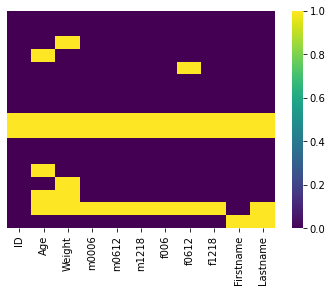

In [ ]:
#Dữ liệu có 1 dòng trống
sns.heatmap(df.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

In [ ]:
# Xoá các dòng dữ liệu rỗng
df.dropna(how="all", inplace = True)

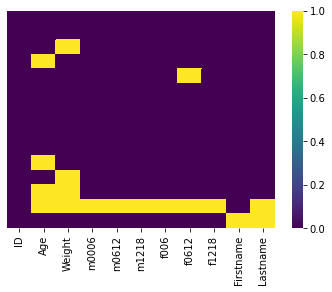

In [ ]:
# trực quan dữ liệu đã  xoá
sns.heatmap(df.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

**VẤN ĐỀ5**


Có nhiều dòng dữ liệu bị trùng lắp thông tin hoàn toàn[fullname, lastname, age, weight,....], giải pháp đưa ra là chỉ giữ lại một dòng dữ liệu, tuy nhiên giải pháp phải dựa trên nghiệp vụ của tập dữ liệu và quan sát của người xử lý.

In [ ]:
df = df.drop_duplicates(subset = ['Firstname','Lastname', 'Age', 'Weight'])
df

,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scööpy,Doo
11,10.0,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck
12,11.0,NaN,60kgs,78,75,72,-,-,-,Henry,Nam


**VẤN ĐỀ 6**

Xuất hiện dữ liệu bị ảnh hưởng bởi lỗi non-ASCII, không định dạng ASCII. Giải pháp: Tùy vào nghiệp vụ ta có thể: xóa dữ liệu tại đó, thay thế bằng dữ liệu khác hoặc thay bằng việc đánh dấu bằng một kí tự khác

In [ ]:
df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True,inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mousé
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scpy,Doo
11,10.0,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck
12,11.0,NaN,60kgs,78,75,72,-,-,-,Henry,Nam


In [ ]:
df.Lastname.replace({r'[^\x00-\x7F]+' :''}, regex =True, inplace =True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther


**VẤN ĐỀ 7**

Thiếu dữ liệu (dữ liệu không đầy đủ) là vấn đề xảy ra nhiều trong các nguồn dữ liệu do nhiều nguyên nhân chủ quan lẫn khách quan.Có một vài giải pháp để xử lý vấn đề này, chủ yếu dựa trên kinh nghiệm và nghiệp vụ về tập dữ liệu đó. Một số giải pháp đưa đề xuất từ chuyên gia như sau:




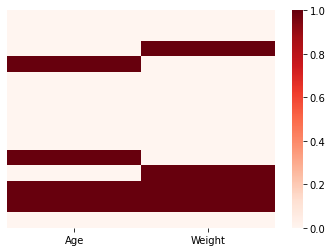

In [ ]:
# Thống kê thông tin dữ liệu thiếu trên từng biến Age và Weight
sns.heatmap(df[['Age','Weight']].isna(), cmap = 'Reds', yticklabels= False)

In [ ]:
#Yêu cầu xử lý dữ liệu thiếu như sau: Nếu dòng nào có Age hoặc Weight có dữ liệu thì phần Age hoặc Weight được tính như bên dưới, nếu thiếu cả 2 thông tin thì xóa dòng
df.drop(df[df.Age.isna() & df.Weight.isna()].index, inplace = True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scpy,Doo
11,10.0,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck
12,11.0,NaN,60kgs,78,75,72,-,-,-,Henry,Nam


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace =True)
#df['Weight'].fillna(df['Weight'].mean(), inplace =True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,ID,Age,Weight,m0006,m0612,m1218,f006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70kgs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,36.1,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90kgs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85kgs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scpy,Doo
11,10.0,12.0,45kgs,-,-,-,92,95,87,Louie,McDuck
12,11.0,36.1,60kgs,78,75,72,-,-,-,Henry,Nam


**VẤN ĐỀ 8**

Ứng dụng melt() function để cập nhật là các columns trong dataframe trên bằng cách giữ lại các cột ID, Age, Weight, Firstname, Lastname. Chuyển các cột m0006, m0612, m1212, f0621, f1218 thành values của cột sex_and_time, giá trị hiện tại của các cột đó sẽ là giá trị của cột mới PluseRate

In [ ]:
df1 = pd.melt(df, id_vars= ['ID','Age','Weight','Firstname','Lastname'], value_name= 'PulseRate', var_name= 'Sex_Time').sort_values(['ID','Age','Weight','Firstname','Lastname'])

In [ ]:
df1

,ID,Age,Weight,Firstname,Lastname,Sex_Time,PulseRate
0,1.0,56.0,70kgs,Micky,Mous,m0006,72
12,1.0,56.0,70kgs,Micky,Mous,m0612,69
24,1.0,56.0,70kgs,Micky,Mous,m1218,71
36,1.0,56.0,70kgs,Micky,Mous,f006,-
48,1.0,56.0,70kgs,Micky,Mous,f0612,-
...,...,...,...,...,...,...,...
23,15.0,52.0,81kgs,NaN,NaN,m0612,-
35,15.0,52.0,81kgs,NaN,NaN,m1218,-
47,15.0,52.0,81kgs,NaN,NaN,f006,68
59,15.0,52.0,81kgs,NaN,NaN,f0612,75


In [ ]:
# Rút gọn giới tính, giới hạn dưới của giờ và nhóm giới hạn trên của giờ
tmp_df= df1["Sex_Time"].str.extract("(\D)(\d+)(\d{2})", expand=True)
#Tên cột
tmp_df.columns=["Sex","hours_lower","hours_upper"]
# Tạo cột Thời gian dựa trên các cột "hours_lower" và "hours_upper"
tmp_df["Time"]=tmp_df["hours_lower"] + "-"+ tmp_df["hours_upper"]

df1 =pd.concat([df1, tmp_df], axis=1)
df1.head()

,ID,Age,Weight,Firstname,Lastname,Sex_Time,PulseRate,Sex,hours_lower,hours_upper,Time
0,1.0,56.0,70kgs,Micky,Mous,m0006,72,m,00,06,00-06
12,1.0,56.0,70kgs,Micky,Mous,m0612,69,m,06,12,06-12
24,1.0,56.0,70kgs,Micky,Mous,m1218,71,m,12,18,12-18
36,1.0,56.0,70kgs,Micky,Mous,f006,-,f,0,06,0-06
48,1.0,56.0,70kgs,Micky,Mous,f0612,-,f,06,12,06-12


In [ ]:
# Bỏ các cột và hàng không cần thiết
df1.drop(['Sex_Time','hours_lower','hours_upper'], axis = 1, inplace = True)
df1 = df1.dropna()
# df1.head()
len(df1.PulseRate)

53

In [ ]:
df1

,ID,Age,Weight,Firstname,Lastname,PulseRate,Sex,Time
0,1.0,56.0,70kgs,Micky,Mous,72,m,00-06
12,1.0,56.0,70kgs,Micky,Mous,69,m,06-12
24,1.0,56.0,70kgs,Micky,Mous,71,m,12-18
36,1.0,56.0,70kgs,Micky,Mous,-,f,0-06
48,1.0,56.0,70kgs,Micky,Mous,-,f,06-12
60,1.0,56.0,70kgs,Micky,Mous,-,f,12-18
1,2.0,34.0,70kgs,Donald,Duck,-,m,00-06
13,2.0,34.0,70kgs,Donald,Duck,-,m,06-12
25,2.0,34.0,70kgs,Donald,Duck,-,m,12-18
37,2.0,34.0,70kgs,Donald,Duck,85,f,0-06


**ĐỀ BÀI**

Thay thế bằng giá trị trung bình liền trước và liền sau của người đó. Nếu không được thì dùng 2)

Thay thế bằng giá trị trung bình 2 giá liền trước của người đó. Nếu không được thì dùng 3)

Thay thế bằng giá trị trung bình 2 giá liền sau của người đó. Nếu không được thì dùng 4)

Trung bình của các giá trị huyết áp của người đó. Nếu không được thì dùng 5)

Trung bình của các giá trị huyết áp của nhóm giới tính. Nếu không được thì dùng 6)

Trung bình của các giá trị dữ liệu. Nếu không được thì thay bằng mức ổn định trong y học

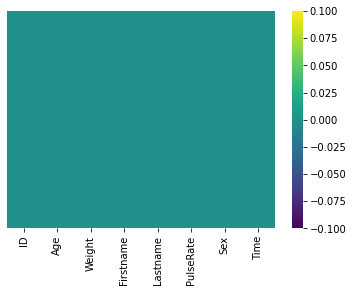

In [ ]:
sns.heatmap(df1.isna(), 
            yticklabels=False, 
            cbar="Yellows", 
            cmap='viridis')

In [ ]:
df1['PulseRate']= df1['PulseRate'].replace({'-' : '0'}, regex=True)
df1["PulseRate"].fillna('0', inplace =True)
len(df1["PulseRate"])

53

In [ ]:
def avgPulserate(df1, firstname):
  sumPulserate = 0
  nsumPulserate = 0
  for i, value in enumerate(df1['Firstname']):
    if value == firstname:
      try:
        if df1['PulseRate'][i] !='0':
          sumPulserate += int(df1['PulseRate'].values[i])
          nsumPulserate += 1
      except:
        pass
  if nsumPulserate > 0:
    return str(sumPulserate/nsumPulserate)
  else:
    return 0

In [ ]:
def isValidIndex1(index, nrows):
  return index - 1 > 0 & index + 1 < nrows

def isValidIndex2(index, nrows):
  return index + 1 < nrows & index + 2 < nrows

def isPulseRateNotNull1(index, df1):
  return str(df1['PulseRate'].values[index-1])!= '0' and str(df1['PulseRate'].values[index+1])!= '0'

def isPulseRateNotNull2(index, df1):
  return str(df1['PulseRate'].values[index+1])!= '0' and str(df1['PulseRate'].values[index +2])!= '0'

def isInGroup1(df1, index, firstname):
  return df1['Firstname'].values[index-1]== firstname and df1['Firstname'].values[index +1]== firstname


def isInGroup2(df1, index, firstname):
  return df1['Firstname'].values[index+1]== firstname and df1['Firstname'].values[index +2]== firstname

In [ ]:
def updatePulseRatena(index, df1):
  nrows = len(df1['PulseRate']) -2
  newvalue = ''
  firstname = df1['Firstname'].values[index]
  try:
    if isValidIndex1(index,nrows) & isPulseRateNotNull1(index, df1) & isInGroup1(df1, index, firstname):
      try: 
        newvalue = (int(df1['PulseRate'].values[index-1]) + int(df1['PulseRate'].values[index+1]))/2
      except:
        newvalue = '0'
    elif isValidIndex2(index,nrows) & isPulseRateNotNull2(index, df1) & isInGroup2(df1, index, firstname):
      try:
        newvalue = (int(df1['PulseRate'].values[index-1]) + int(df1['PulseRate'].values[index+1]))/2
      except:
        newvalue ='0'
    else:
      newvalue = avgPulserate(df1, firstname)
  except:
      newvalue = avgPulserate(df1, firstname)
  finally:
    pass
  return newvalue

In [ ]:
len(df1["PulseRate"])

53

In [ ]:
pulserateupdate = []
for index, value in enumerate(df1["PulseRate"]):
  if value =='0' or value == '':
    newvalue = updatePulseRatena(index, df1)
    pulserateupdate.append(newvalue)
  else:
    pulserateupdate.append(value)

In [ ]:
len(pulserateupdate)

53

In [ ]:
df1["PulseRateUpdate"] = pulserateupdate
df1

,ID,Age,Weight,Firstname,Lastname,PulseRate,Sex,Time,PulseRateUpdate
0,1.0,56.0,70kgs,Micky,Mous,72,m,00-06,72
12,1.0,56.0,70kgs,Micky,Mous,69,m,06-12,69
24,1.0,56.0,70kgs,Micky,Mous,71,m,12-18,71
36,1.0,56.0,70kgs,Micky,Mous,0,f,0-06,36.0
48,1.0,56.0,70kgs,Micky,Mous,0,f,06-12,36.0
60,1.0,56.0,70kgs,Micky,Mous,0,f,12-18,36.0
1,2.0,34.0,70kgs,Donald,Duck,0,m,00-06,42.5
13,2.0,34.0,70kgs,Donald,Duck,0,m,06-12,42.5
25,2.0,34.0,70kgs,Donald,Duck,0,m,12-18,42.5
37,2.0,34.0,70kgs,Donald,Duck,85,f,0-06,85
